In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Model

In [0]:
#Load data
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train/255
x_test = x_test / 255
print('x_train.shape:', x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
#The data is only 2D

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
y_test[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [7]:
#number of class
K = len(set(y_train))
print('Number of classes:',K)

Number of classes: 10


In [0]:
#Build the model using the function API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides=2, activation = 'relu')(x)
x = Conv2D(128,(3,3), strides=2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu') (x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)


In [9]:
#Compile and fit
#Note: make sure you are using GPU for this!
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)


Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5212 - accuracy: 0.8079 - val_loss: 0.3991 - val_accuracy: 0.8504
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3630 - accuracy: 0.8638 - val_loss: 0.3640 - val_accuracy: 0.8621
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3165 - accuracy: 0.8806 - val_loss: 0.3247 - val_accuracy: 0.8808
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2822 - accuracy: 0.8942 - val_loss: 0.3157 - val_accuracy: 0.8843
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2551 - accuracy: 0.9044 - val_loss: 0.3057 - val_accuracy: 0.8879
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2345 - accuracy: 0.9113 - val_loss: 0.3000 - val_accuracy: 0.8915
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2147 - accuracy: 0.9193 - val_loss: 0.2957 - val_accuracy:

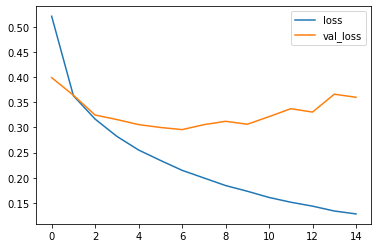

In [10]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

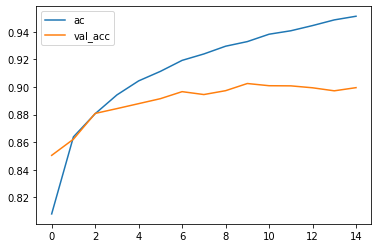

In [19]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='ac')
plt.plot(r.history['val_accuracy'], label ='val_acc')
plt.legend()

Confusion matrix, without normalization
[[877   2  23  17   3   2  70   0   6   0]
 [  5 978   0  13   2   0   1   0   1   0]
 [ 22   1 883  12  34   0  48   0   0   0]
 [ 14   5  19 896  34   2  30   0   0   0]
 [  0   2  76  29 818   0  74   0   1   0]
 [  0   0   0   0   1 977   0  12   0  10]
 [115   2  77  28  86   1 684   0   6   1]
 [  0   0   0   0   0  17   0 945   0  38]
 [  1   3   8   2   4   2   6   2 970   2]
 [  1   0   0   0   0  10   0  22   0 967]]


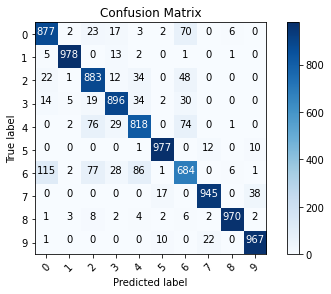

In [27]:
#Plot confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True.
  """

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print ('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm,interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt= '.2f' if normalize else 'd'
  thresh= cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment='center',
             color ='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
p_test2 = model.predict(x_test)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))


In [0]:
#LAbel mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

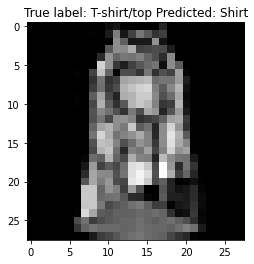

In [45]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));